Importing libraries needed for the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import math

In [2]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.0.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 3.8.0
pip: 10.0.1
setuptools: 40.2.0
Cython: 0.28.5
numpy: 1.15.1
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 6.5.0
sphinx: 1.7.9
patsy: 0.5.0
dateutil: 2.7.3
pytz: 2018.5
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 2.2.3
openpyxl: 2.5.6
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.1.0
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.11
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


Reading in the dataset and showing the head of this dataset.

In [2]:
metadata = pd.read_csv('CBTTC_metadata.csv')
metadata.head(14)

,id,name,project,CBTTC Event ID,vital_status,ethnicity,Kids First Participant ID,gender,race,disease_type,...,primary_site,age_at_diagnosis,aliquot_id,library_id,reference_genome,case_id,Diagnosis,CBTTC Subject ID,CBTTC Aliquot ID,experimental_strategy
0,5c50bd69e4b07ea2c0aefef0,558995e5-c2cb-441c-a1ea-dcb4d03c50b2.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-75,Alive,Not Hispanic or Latino,PT_Y0SNEN8Y,Male,White,Dysembryoplastic neuroepithelial tumor (DNET),...,Frontal Lobe,3830.0,739791.0,NaN,NaN,C18696,Dysembryoplastic neuroepithelial tumor (DNET),C18696,7316-75_739949,WGS
1,5c50bd69e4b07ea2c0aefef2,4e58f03f-8347-4375-b5ab-36161623d7bd.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-2005,Alive,Not Hispanic or Latino,PT_CGWPWSXM,Male,White,Ganglioglioma,...,Temporal Lobe,600.0,573079.0,NaN,NaN,C412542,Ganglioglioma,C412542,7316-2005,WGS
2,5c50bd69e4b07ea2c0aefef3,5bbd8fb5-bc21-4e22-be3f-5d82ab408cd4.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-99,Deceased-due to disease,Not Hispanic or Latino,PT_SCRJF38G,Female,White,Medulloblastoma,...,Cerebellum/Posterior Fossa,715.0,612699.0,NaN,NaN,C18081,Medulloblastoma,C18081,7316-99_608923,WGS
3,5c50bd69e4b07ea2c0aefef5,55a0b44f-9178-4bce-bef8-b9c2debc1af2.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-2322,Deceased-due to disease,Not Hispanic or Latino,PT_V8714N9H,Male,White,Medulloblastoma,...,Cerebellum/Posterior Fossa,761.0,563957.0,NaN,NaN,C647349,Medulloblastoma,C647349,7316-2322,WGS
4,5c50bd69e4b07ea2c0aefef8,63245568-be8e-47e8-8b34-8b42b2f5ea6c.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-87,Alive,Not Hispanic or Latino,PT_WE1CHTWK,Male,White,Supratentorial or Spinal Cord PNET,...,Frontal Lobe,523.0,62332.0,NaN,NaN,C26199,Supratentorial or Spinal Cord PNET,C26199,7316-87_401963,WGS
5,5c50bd69e4b07ea2c0aefefa,58dd83ba-1d8b-416e-9aac-29301216c3d9.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-2578,Alive,Not Hispanic or Latino,PT_06ERX8Z7,Female,Black or African American,Subependymal Giant Cell Astrocytoma (SEGA),...,Ventricles,3635.0,588178.0,NaN,NaN,C714138,Subependymal Giant Cell Astrocytoma (SEGA),C714138,7316-2578_588462,WGS
6,5c50bd69e4b07ea2c0aefefb,515772da-a356-4242-89ad-9b9c4e10ddd8.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-39,Alive,Not Hispanic or Latino,PT_MA0J8DSN,Male,White,Dysembryoplastic neuroepithelial tumor (DNET),...,Frontal Lobe,1817.0,739818.0,NaN,NaN,C23001,Dysembryoplastic neuroepithelial tumor (DNET),C23001,7316-39_739964,WGS
7,5c50bd69e4b07ea2c0aefefe,515b3138-b819-4ccd-9187-8f1e5835f8e1.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-278,Deceased-due to disease,Not Hispanic or Latino,PT_9S6WMQ92,Female,White,Medulloblastoma,...,Cerebellum/Posterior Fossa,5534.0,357637.0,NaN,NaN,C25830,Medulloblastoma,C25830,7316-278_257637,WGS
8,5c50bd69e4b07ea2c0aefeff,6a6db8a2-30ed-426f-90e5-dd0b6b2c719a.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-2609,Alive,Not Hispanic or Latino,PT_3PK66TJY,Female,White,Ependymoma,...,Cerebellum/Posterior Fossa,629.0,573091.0,NaN,NaN,C659034,Ependymoma,C659034,7316-2609,WGS
9,5c50bd69e4b07ea2c0aeff01,6c5bbbd5-b412-4515-890d-57a639161423.strelka.v...,pkemmeren/genetic-interactions-in-pediatric-ca...,7316-112,Alive,Hispanic or Latino,PT_K6CR9D53,Female,Other,Dysembryoplastic neuroepithelial tumor (DNET),...,Temporal Lobe,2600.0,717030.0,NaN,NaN,C29643,Dysembryoplastic neuroepithelial tumor (DNET),C29643,7316-112_717117,WGS


Which diagnoses are present in the dataset?

In [10]:
metadata['Diagnosis']

0         Dysembryoplastic neuroepithelial tumor (DNET)
1                                         Ganglioglioma
2                                       Medulloblastoma
3                                       Medulloblastoma
4                    Supratentorial or Spinal Cord PNET
5            Subependymal Giant Cell Astrocytoma (SEGA)
6         Dysembryoplastic neuroepithelial tumor (DNET)
7                                       Medulloblastoma
8                                            Ependymoma
9         Dysembryoplastic neuroepithelial tumor (DNET)
10                               Neurofibroma/Plexiform
11                                      Medulloblastoma
12                                    Craniopharyngioma
13                                 Ganglioneuroblastoma
14        Low-grade glioma/astrocytoma (WHO grade I/II)
15        Low-grade glioma/astrocytoma (WHO grade I/II)
16        Low-grade glioma/astrocytoma (WHO grade I/II)
17                             Choroid plexus ca

How many of each diagnoses are present in the dataset?

In [13]:
metadata.groupby('Diagnosis')['Diagnosis'].agg('count').sort_values(ascending=False)

Diagnosis
Low-grade glioma/astrocytoma (WHO grade I/II)                                     248
Medulloblastoma                                                                   112
High-grade glioma/astrocytoma (WHO grade III/IV)                                  100
Ependymoma                                                                         82
Ganglioglioma                                                                      47
Craniopharyngioma                                                                  37
Other                                                                              37
Meningioma                                                                         32
Atypical Teratoid Rhabdoid Tumor (ATRT)                                            31
Dysembryoplastic neuroepithelial tumor (DNET)                                      25
Neurofibroma/Plexiform                                                             18
Schwannoma                                  

How many of each disease are present in th dataset if you look at disease_type instead of diagnosis?

In [8]:
metadata.groupby('disease_type')['disease_type'].agg('count').sort_values(ascending=False)

disease_type
Low-grade glioma/astrocytoma (WHO grade I/II)                                     252
Medulloblastoma                                                                   113
High-grade glioma/astrocytoma (WHO grade III/IV)                                  100
Ependymoma                                                                         82
Ganglioglioma                                                                      48
Other                                                                              41
Craniopharyngioma                                                                  39
Meningioma                                                                         32
Atypical Teratoid Rhabdoid Tumor (ATRT)                                            31
Dysembryoplastic neuroepithelial tumor (DNET)                                      26
Neurofibroma/Plexiform                                                             20
Schwannoma                               

How many samples are from the 20 most prevalent diagnoses?

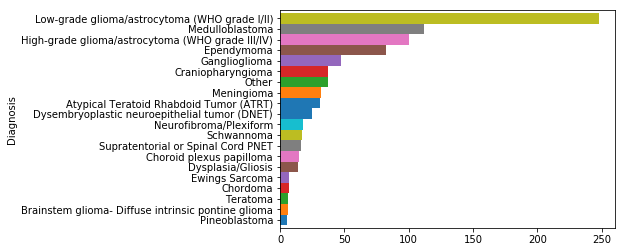

In [63]:
metadata.groupby('Diagnosis')['Diagnosis'].agg('count').sort_values(ascending=False).head(20).sort_values(ascending=True).plot.barh(width=1)
plt.show()

How many samples are from the 20 most prevalent disease types? Is this plot different than the one above?

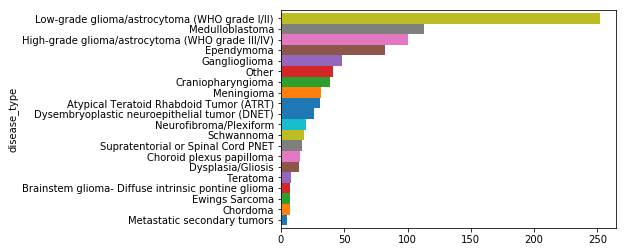

In [64]:
metadata.groupby('disease_type')['disease_type'].agg('count').sort_values(ascending=False).head(20).sort_values(ascending=True).plot.barh(width=1)
plt.show()

How many samples are there from each age?

0     53
1     60
2     56
3     57
4     48
5     44
6     54
7     50
8     39
9     53
10    48
11    51
12    50
13    46
14    30
15    31
16    40
17    36
18    19
19    16
20    17
21     7
22    13
23     7
25     2
26     5
27     2
30     2
31     1
36     1
dtype: int64

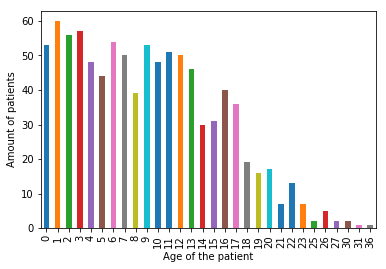

In [3]:
import math
agelist = []
for x in metadata['age_at_diagnosis']/365:
    if (not math.isnan(x)):
        agelist.append(math.trunc(x))
age_series = pd.Series(agelist)
age_series.value_counts().sort_index().plot.bar()
plt.xlabel("Age of the patient")
plt.ylabel("Amount of patients")
age_series.value_counts().sort_index()

What is the age distribution in the DKFZ dataset?

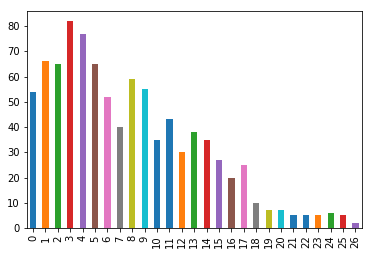

In [91]:
import math
dkfzdata = pd.read_table('dkfz_metadata3.xlsx', sep = "\t")
dkfzage = []
dkfzdata.head(14)
for x in dkfzdata['Age']:
    if isinstance(x, str):
        age = float(x.replace(",", "."))
        dkfzage.append(math.trunc(age))
dkfzage_series = pd.Series(dkfzage)
dkfzage_series.value_counts().sort_index().plot.bar()


In which samples is diagnosis not equal to disease_type?

In [61]:
diagnosis_ne_diseasetype = metadata[(metadata['Diagnosis'] != metadata['disease_type'])]
diagnosis_ne_diseasetype [['Diagnosis', 'disease_type']]

,Diagnosis,disease_type
45,NaN,Other
47,NaN,Schwannoma
53,NaN,Neurofibroma/Plexiform
87,NaN,Craniopharyngioma
133,NaN,Malignant peripheral nerve sheath tumor (MPNST)
159,NaN,Adenoma
171,NaN,Dysembryoplastic neuroepithelial tumor (DNET)
182,NaN,Low-grade glioma/astrocytoma (WHO grade I/II)
226,NaN,Other
241,NaN,Teratoma


How many male/female are there in this dataset?

In [68]:
metadata.groupby('gender')['gender'].agg('count')

gender
Female          443
Male            501
Not Reported      2
Name: gender, dtype: int64

How many procent is male/female?

In [84]:
female = metadata[(metadata['gender'] == 'Female')]['gender'].count()
male = metadata[(metadata['gender'] == 'Male')]['gender'].count()
total = female + male
print("Female: ", round((female/total)*100,1))
print("Male: ", round((male/total)*100, 1))

Female:  46.9
Male:  53.1


Is CBTTC Event ID unique, or can CBTTC Event ID be more prevalent in the dataset?

In [3]:
eventlist = []
for x in metadata['CBTTC Event ID']:
    eventlist.append(x)
print ("Total number of samples:", len(eventlist))
print("Unique CBTTC Event IDs:", len(set(eventlist)))

Total number of samples: 946
Unique CBTTC Event IDs: 895


Which Event ID's are more prevalent in the dataset and how often do they come across?

In [7]:
eventlist = []
for x in metadata['CBTTC Event ID']:
    eventlist.append(x)
morelist = []
for x in eventlist:
    if eventlist.count(x) > 1:
        morelist.append(x)
moretimeslist = set(morelist)
for x in moretimeslist:
    print(x, ":", eventlist.count(x))


nan : 23
7316-2176 : 2
7316-14 : 2
7316-2686 : 2
7316-1765 : 2
7316-1463 : 2
7316-1746 : 2
7316-99 : 2
7316-1763 : 3
7316-193 : 2
7316-2322 : 2
7316-195 : 3
7316-95 : 2
7316-3058 : 3
7316-2189 : 3
7316-24 : 2
7316-931 : 2
7316-950 : 2
7316-1769 : 2
7316-178 : 2
7316-913 : 3
7316-2151 : 2
7316-85 : 4


In [ ]:
Does sample_id have nan values?

In [12]:
eventlist2 = []
for x in metadata['sample_id']:
    eventlist2.append(x)
morelist2 = []
for x in eventlist2:
    if eventlist2.count(x) > 1:
        morelist2.append(x)
moretimeslist2 = set(morelist2)
for x in moretimeslist2:
    print(x, ":", eventlist2.count(x))

7316-2176 : 2
7316-14 : 2
7316-2686 : 2
7316-1765 : 2
7316-1463 : 2
7316-1746 : 2
7316-99 : 2
7316-1763 : 3
7316-193 : 2
7316-2322 : 2
7316-195 : 3
7316-95 : 2
7316-3058 : 3
7316-2189 : 3
7316-24 : 2
7316-931 : 2
7316-950 : 2
7316-1769 : 2
7316-178 : 2
7316-913 : 3
7316-2151 : 2
7316-85 : 4


What is the difference between cbttc event id and sample id?

In [22]:
print(moretimeslist - moretimeslist2)

{nan}


Which ones of the double cbttc event id's have the same biospecimen id?

In [68]:
double_biospecimen = {}
for x in moretimeslist:
    double_biospecimen[x] = []

cbttc_list = metadata['CBTTC Event ID'].tolist()
biospecimen_list = metadata['Kids First Biospecimen ID'].tolist()

for i in range(len(cbttc_list)):
    if (cbttc_list[i] in moretimeslist):
        (double_biospecimen[cbttc_list[i]].append(biospecimen_list[i]))
for x in double_biospecimen:
    print(x, ":", double_biospecimen[x])
    if (len(set(double_biospecimen[x]))) < (len(double_biospecimen[x])):
        print ("**Double biospecimen**")

nan : ['BS_BS5X4H0Y', 'BS_MDVMT75X', 'BS_KSRYKCDE', 'BS_T8C13KNH', 'BS_X2G3JMM1', 'BS_A9S5HT6P', 'BS_8JFMP1T1', 'BS_41SWNWAG', 'BS_9R82A3VT', 'BS_10HD18B8', 'BS_AG0BZN6F', 'BS_36HCZ3KW', 'BS_Z9NCH2XA', 'BS_0XD58YD9', 'BS_3ZASRA3A', 'BS_D59VEERR', 'BS_HYGK88B0', 'BS_BM95DGCQ', 'BS_AJAH8KG5', 'BS_A70G7S2W', 'BS_AFAHY6HP', 'BS_PDRNE606', 'BS_5RD8KEED']
7316-195 : ['BS_JGKRN7NA', 'BS_AYPBAHJ6', 'BS_XMP9XNR9']
7316-24 : ['BS_DDC2WVJY', 'BS_WWTPH7KN']
7316-1463 : ['BS_KH3859M5', 'BS_NASADC3P']
7316-2189 : ['BS_ERFMPQN3', 'BS_D0T6V861', 'BS_02YBZSBY']
7316-1769 : ['BS_RXP2ZRQT', 'BS_KY1CTGJ3']
7316-2151 : ['BS_SKRY0BJ4', 'BS_TX8C5VAJ']
7316-931 : ['BS_W37QBA12', 'BS_2J4FG4HV']
7316-3058 : ['BS_P0QJ1QAH', 'BS_QWM9BPDY', 'BS_HM5GFJN8']
7316-950 : ['BS_0HYD1VHH', 'BS_80X7AVCP']
7316-2686 : ['BS_TC8R5HY4', 'BS_JX1PK0VW']
7316-913 : ['BS_FJEZ3ASV', 'BS_PKZ1HWNB', 'BS_742CDKAS']
7316-193 : ['BS_5Z4XQC9X', 'BS_5Z4XQC9X']
**Double biospecimen**
7316-14 : ['BS_RENPFFNK', 'BS_5BMNK8SY']
7316-95 : ['BS_

Get kids first participant ID and filename from the double ones.

In [78]:
double_biospecimen2 = {}
for x in moretimeslist:
    double_biospecimen2[x] = []

cbttc_list2 = metadata['CBTTC Event ID'].tolist()
kfparticipant_list = metadata['Kids First Participant ID'].tolist()
filenames = metadata['name'].tolist()

for i in range(len(cbttc_list2)):
    if (cbttc_list2[i] in moretimeslist):
        (double_biospecimen2[cbttc_list2[i]].append(kfparticipant_list[i]))
        (double_biospecimen2[cbttc_list2[i]].append(filenames[i]))

counter = 0
for x in double_biospecimen2:
    if counter > 0:
        print("\n", x, ":")
        for y in double_biospecimen2[x]:
            print(y)
    counter += 1
    


 7316-195 :
PT_Y5KY6KN9
23b31881-c0bc-4bef-9544-920b298b15a6.strelka.vep.maf
PT_Y5KY6KN9
60e7a8a0-a578-473c-9906-9cc276aa7ab3.strelka.vep.maf
PT_Y5KY6KN9
0868fe0e-3e4f-4683-bb36-b54d7fe1e9b6.strelka.vep.maf

 7316-24 :
PT_TGQY3X3W
23332257-5d9d-493f-be15-a61f9dbd3d69.strelka.vep.maf
PT_TGQY3X3W
f64e8f6e-474c-4336-a5f0-06c7a29221a0.strelka.vep.maf

 7316-1463 :
PT_DTP4MMRA
a108a6c9-df58-44c5-912e-067bb8ca3aba.strelka.vep.maf
PT_DTP4MMRA
f45aabab-6dea-4483-80f3-d56e2996e85a.strelka.vep.maf

 7316-2189 :
PT_VTM2STE3
7866a663-84fa-4d3b-996c-40e4843e7919.strelka.vep.maf
PT_VTM2STE3
996fbe65-725f-4d8f-a8f8-b2b2ef9367bf.strelka.vep.maf
PT_VTM2STE3
dad3c511-c031-47c7-a366-cf3d3c1f41c1.strelka.vep.maf

 7316-1769 :
PT_JSFBMK5V
2726fc49-02e1-4b3b-bb21-e40b166203dc.strelka.vep.maf
PT_JSFBMK5V
ddeb5245-f54c-45e6-a949-914fb26df6e7.strelka.vep.maf

 7316-2151 :
PT_HNZNZ635
002b69f8-45f0-444f-9508-69702206ef3e.strelka.vep.maf
PT_HNZNZ635
d90567c9-85ef-4ae1-9bb6-3c34c3c26f9a.strelka.vep.maf

 7316-93

How many survivors and how many deceased?

In [43]:
deceased = metadata[(metadata['vital_status'].str.contains('Deceased')==True)]['vital_status'].count()
alive = metadata[(metadata['vital_status'] == 'Alive')]['vital_status'].count()
print ("Deceased:", deceased)
print ("Alive:", alive)
unknown = 946 - deceased - alive
print("Unknown:", unknown)


Deceased: 163
Alive: 737
Unknown: 46


Can you distinguish different groups by Medulloblastoma by looking at sample clinical event origin?

In [56]:
sampleclinic = metadata[(metadata['disease_type'] == 'Medulloblastoma')]['Sample Clinical Event Origin']
samplecliniclist = []
for x in sampleclinic:
    samplecliniclist.append(x)
all_origins = set(samplecliniclist)
for x in all_origins:
    print(x, samplecliniclist.count(x))

nan 1
Progressive CNS Tumor 7
Initial CNS Tumor 105


Can you distinguish different groups by Medulloblastoma by looking at primary site?

In [58]:
primary_site = metadata[(metadata['disease_type'] == 'Medulloblastoma')]['primary_site']
primary_sitelist = []
for x in primary_site:
    primary_sitelist.append(x)
all_sites = set(primary_sitelist)
for x in all_sites:
    print(x, primary_sitelist.count(x))

Ventricles 6
Cerebellum/Posterior Fossa; ;Ventricles 5
Cerebellum/Posterior Fossa;Ventricles 4
Brain Stem- Midbrain/Tectum; ;Cerebellum/Posterior Fossa; ;Occipital Lobe; ;Optic Pathway; ;Parietal Lobe; ;Temporal Lobe;Temporal Lobe;Temporal Lobe 1
Cerebellum/Posterior Fossa; ;Spinal Cord- Lumbar/Thecal Sac 1
Cerebellum/Posterior Fossa;Spinal Cord- Cervical;Spinal Cord- Lumbar/Thecal Sac;Spinal Cord- Thoracic 2
Cerebellum/Posterior Fossa; ;Spinal Cord- Thoracic 1
Occipital Lobe 1
Cerebellum/Posterior Fossa;Meninges/Dura;Spinal Cord- Cervical;Spinal Cord- Thoracic;Ventricles 1
Frontal Lobe 1
Cerebellum/Posterior Fossa;Spinal Cord- Lumbar/Thecal Sac 1
Cerebellum/Posterior Fossa 85
Cerebellum/Posterior Fossa; ;Suprasellar/Hypothalamic/Pituitary 3
Cerebellum/Posterior Fossa; ;Spinal Cord- Cervical; ;Spinal Cord- Lumbar/Thecal Sac; ;Spinal Cord- Thoracic 1


Multiple boxplots of the age distribution off the 9 most common cancer types 

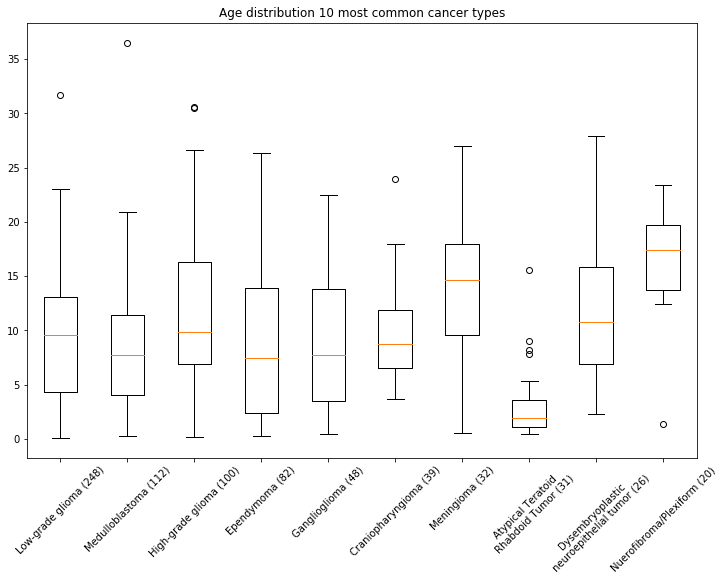

In [4]:
#Low-grade glioma/astrocytoma (WHO grade I/II)                                     248
#Medulloblastoma                                                                   112
#High-grade glioma/astrocytoma (WHO grade III/IV)                                  100
#Ependymoma                                                                         82
#Ganglioglioma                                                                      48
#Other                                                                              41
#Craniopharyngioma                                                                  39
#Meningioma                                                                         32
#Atypical Teratoid Rhabdoid Tumor (ATRT)                                            31
#Dysembryoplastic neuroepithelial tumor (DNET)                                      26
#Neurofibroma/Plexiform     


def make_boxplot_list(diseasetype):
    agelist = []
    disease_age = (metadata[(metadata['disease_type']== diseasetype)])['age_at_diagnosis']
    for x in disease_age:
        if (not math.isnan(x)):
            age = x / 365.25
            agelist.append(age)
    return agelist

def main():
    lowgradelist = make_boxplot_list("Low-grade glioma/astrocytoma (WHO grade I/II)")
    medullolist = make_boxplot_list("Medulloblastoma")
    highgradelist = make_boxplot_list("High-grade glioma/astrocytoma (WHO grade III/IV)")
    ependymomalist = make_boxplot_list("Ependymoma")
    gangliolist = make_boxplot_list("Ganglioglioma")
    craniolist = make_boxplot_list("Craniopharyngioma")
    meningiomalist = make_boxplot_list("Meningioma")
    rhabdoidlist = make_boxplot_list("Atypical Teratoid Rhabdoid Tumor (ATRT)")
    dysneurolist = make_boxplot_list("Dysembryoplastic neuroepithelial tumor (DNET)")
    neurofiblist = make_boxplot_list("Neurofibroma/Plexiform")
    
    data = [lowgradelist, medullolist, highgradelist, ependymomalist, gangliolist, craniolist, 
            meningiomalist, rhabdoidlist, dysneurolist, neurofiblist]
    fig = plt.figure(1, figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.set_title("Age distribution 10 most common cancer types")
    ax1.boxplot(data)
    ax1.set_xticklabels(['Low-grade glioma (248)', 'Medulloblastoma (112)', 'High-grade glioma (100)',
                         'Ependymoma (82)', 'Ganglioglioma (48)', 'Craniopharyngioma (39)', 'Meningioma (32)',
                        'Atypical Teratoid\n Rhabdoid Tumor (31)', 'Dysembryoplastic\n neuroepithelial tumor (26)',
                        'Nuerofibroma/Plexiform (20)'], rotation = 45)
main()

What are the ages of the "other" category?

In [135]:
otherlist = make_boxplot_list("Other")
print (otherlist)

[14.381930184804927, 11.132101300479125, 14.088980150581794, 15.578370978781656, 0.8323066392881588, 7.742642026009582, 10.028747433264886, 11.433264887063656, 20.3750855578371, 6.357289527720739, 10.05886379192334, 3.132101300479124, 0.32306639288158795, 15.304585900068446, 1.4565366187542779, 10.948665297741274, 1.3059548254620124, 8.183436002737851, 14.915811088295689, 0.06023271731690623, 7.863107460643395, 1.0321697467488022, 16.67898699520876, 3.1047227926078027, 0.6598220396988365, 8.700889801505818, 19.170431211498972, 16.5968514715948, 15.66050650239562, 15.657768651608487, 2.5051334702258727, 23.8466803559206, 3.509924709103354, 12.39151266255989, 5.577002053388091, 10.151950718685832, 4.251882272416153, 11.953456536618754, 7.898699520876113]


Which patients are more often prevalent in the dataset?

In [20]:
onetime = 0
patientlist = []
for x in metadata['Kids First Participant ID']:
    patientlist.append(x)
more_list = []
for x in patientlist:
    if patientlist.count(x) > 1:
        more_list.append(x)
    else:
        onetime += 1
moretimespatient = set(more_list)
for x in moretimespatient:
    print(x, ":", patientlist.count(x))
print("Total number of samples:", len(patientlist))
print("Number of patients that occur once in the dataset:", onetime)
print("Number of samples from patients that occur more than once:", len(more_list))
print("Number of patients that occur more than once:", len(moretimespatient))

PT_AWMZ12NP : 2
PT_V8714N9H : 2
PT_KCTZZA3G : 2
PT_4347ZBEX : 3
PT_WP871F5S : 2
PT_RGX23JFP : 2
PT_W6AWJJK7 : 2
PT_J06X17XH : 2
PT_2E552BAR : 2
PT_MDWPRDBT : 4
PT_ESHACWF6 : 2
PT_3AWKWXEV : 4
PT_C2D4JXS1 : 2
PT_9S6WMQ92 : 4
PT_3T3VGWC6 : 2
PT_J50NZYZF : 2
PT_RJ1TJ2KH : 2
PT_HFQNKP5X : 4
PT_2ECVKTTQ : 2
PT_NESAQHB1 : 2
PT_37B5JRP1 : 2
PT_8RB7TPS2 : 2
PT_PR4YBBH3 : 2
PT_02J5CWN5 : 2
PT_59D00MBQ : 2
PT_XHYBZKCX : 2
PT_3D74J8RZ : 2
PT_Y572BRC1 : 3
PT_HT4HJXY6 : 2
PT_XA98HG1C : 3
PT_9PJR0ZK7 : 2
PT_DH8A0SNQ : 2
PT_ZMKMKCFQ : 2
PT_VAJN5QP8 : 2
PT_00G007DM : 2
PT_GR8P8NY5 : 2
PT_3R0P995B : 2
PT_3CHB9PK5 : 2
PT_CXT81GRM : 2
PT_TXFYRDP4 : 2
PT_S2SQJVGK : 2
PT_Z4PJA6KT : 3
PT_9DMMZ08D : 2
PT_MQYPS0W1 : 2
PT_TKWTTRQ7 : 2
PT_3KM9W8S8 : 2
PT_DFQAH7RS : 2
PT_2FVTD0WR : 2
PT_ZZRBX5JT : 3
PT_1H2REHT2 : 3
PT_XTVQB9S4 : 2
PT_38FS37DP : 2
PT_FN4GEEFR : 2
PT_KMHGNCNR : 2
PT_6MWPJ96F : 2
PT_AQWDQW27 : 3
PT_89XRZBSG : 2
PT_2YT37G8P : 2
PT_QD6KKKJH : 2
PT_DTP4MMRA : 2
PT_H45M7M2T : 2
PT_HJMP6PH2 : 2
PT_SCRJF

How many samples from each medulloblastoma subtype?

In [12]:
medullo_data.groupby('molecular_subtype')['molecular_subtype'].agg('count').sort_values(ascending=False)


molecular_subtype
Group4    58
SHH       27
Group3    26
WNT       12
Name: molecular_subtype, dtype: int64

Barplot subtypes medulloblastoma

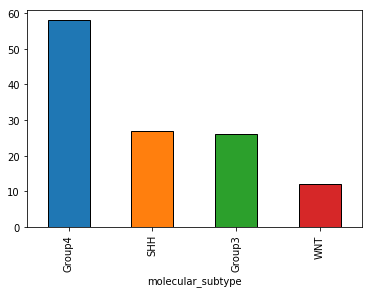

In [3]:
medullo_data = pd.read_table('cbttc-histologies2.xlsx')
medullo_data.groupby('molecular_subtype')['molecular_subtype'].agg('count').sort_values(ascending=False).plot.bar(edgecolor='black')


Make boxplot of the ages of the subtypes of medulloblastoma

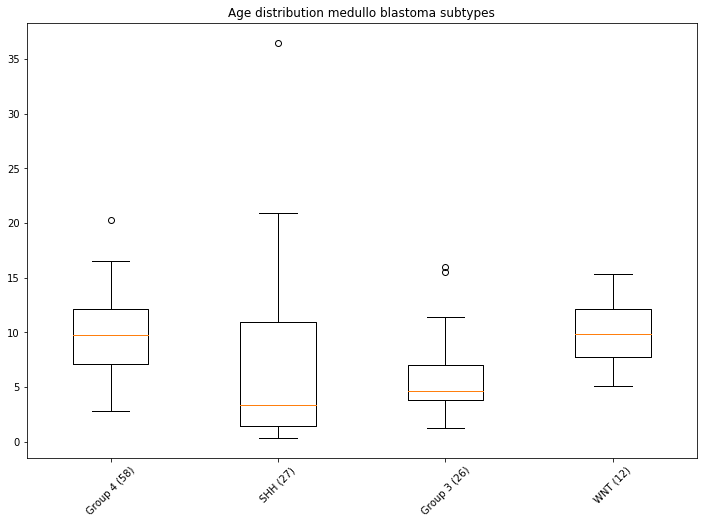

In [8]:
def make_medullo_boxplot_list(diseasetype):
    agelist = []
    disease_age = (medullo_data[(medullo_data['molecular_subtype']== diseasetype)])['age_at_diagnosis_days']
    for x in disease_age:
        if (not math.isnan(x)):
            age = x / 365.25
            agelist.append(age)
    return agelist

def main():
    group4list = (make_medullo_boxplot_list("Group4"))
    shhlist = (make_medullo_boxplot_list("SHH"))
    group3list = (make_medullo_boxplot_list("Group3"))
    wntlist = (make_medullo_boxplot_list("WNT"))
    
    data = [group4list, shhlist, group3list, wntlist]
    fig = plt.figure(1, figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.set_title("Age distribution medullo blastoma subtypes")
    ax1.boxplot(data)
    ax1.set_xticklabels(['Group 4 (58)', 'SHH (27)', 'Group 3 (26)', 'WNT (12)'], rotation = 45)
main()

Total number of each type of samples

In [47]:
def check_cns (cns_type):
    initial = 0
    progressive = 0
    recurrence = 0
    second = 0
    if (cns_type == "Initial CNS Tumor"):
        initial += 1
    elif (cns_type == "Progressive CNS Tumor" or cns_type == "Progressive" or cns_type == " Progressive CNS Tumor"):
        progressive += 1
    elif (cns_type == "Recurrence CNS Tumor" or cns_type == "Recurrence"):
        recurrence += 1
    elif (cns_type == "Second Malignancy"):
        second += 1
    return initial, progressive, recurrence, second

def main():
    initial_list = []
    file = open("CBTTC_metadata.csv", "r")
    initial_cns = 0
    progressive_cns = 0
    recurrence_cns = 0
    second_malignancy = 0
    other = 0
    for x in file:
        if len(x.split(",")[10]) < 1:
            initial, progressive, recurrence, second = check_cns (x.split(",")[12])
        else:
            initial, progressive, recurrence, second = check_cns (x.split(",")[10])
        initial_cns += initial
        progressive_cns += progressive
        recurrence_cns += recurrence
        second_malignancy += second
        if initial == 1:
            initial_list.append(x.split(",")[6])
            if x.split(",")[9] == "Other":
                other += 1      
       
    print("Initial CNS tumor:", initial_cns)
    print("Progressive CNS tumor:", progressive_cns)
    print("Recurrence CNS tumor:", recurrence_cns)
    print("Second malignancy:", second_malignancy)
    print("Unique identifiers initial CNS tumor:", len(set(initial_list)))
    print("Number of initial identifiers that are of disease type other:", other)
    print("Total of initial samples without disease type other", len(set(initial_list))-other)
    print("Percentage initial vs all samples", (657/946) * 100, "%")
    file.close()
main()

Initial CNS tumor: 723
Progressive CNS tumor: 139
Recurrence CNS tumor: 65
Second malignancy: 19
Unique identifiers initial CNS tumor: 688
Number of initial identiers that are of disease type other: 31
Total of initial samples without disease type other 657
Percentage initial vs all samples 69.45031712473573 %


Make barplot of amount of cancer types of the filtered patient files

In [11]:
patientfiledata = pd.read_table('patientfiles.txt', sep = "\t", names = ["filename", "fileidentifier", "patientidentifier", "cancertype", "subtype"])
patientfiledata.head()
patientfiledata.groupby('subtype')['subtype'].agg('count').sort_values(ascending=False).sort_values(ascending=False)

subtype
Low-grade glioma/astrocytoma (WHO grade I/II)             224
Ependymoma                                                 68
Medulloblastoma Group4                                     45
Ganglioglioma                                              43
High-grade glioma/astrocytoma (WHO grade III/IV) Other     40
Craniopharyngioma                                          36
Atypical Teratoid Rhabdoid Tumor (ATRT)                    27
Dysembryoplastic neuroepithelial tumor (DNET)              23
Meningioma                                                 21
Medulloblastoma Group3                                     19
High-grade glioma/astrocytoma (WHO grade III/IV) K27M      18
Medulloblastoma SHH                                        17
Choroid plexus papilloma                                   15
Dysplasia/Gliosis                                          14
Supratentorial or Spinal Cord PNET                         12
Schwannoma                                                 12


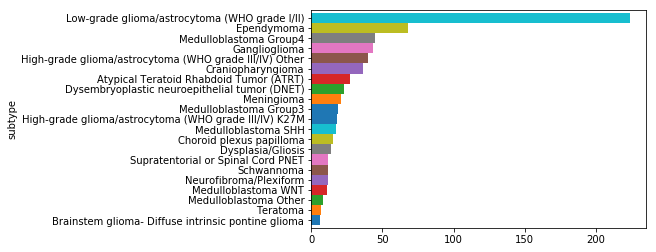

In [18]:
patientfiledata.groupby('subtype')['subtype'].agg('count').sort_values(ascending=False).head(21).sort_values(ascending=True).plot.barh(width=1)
plt.show()

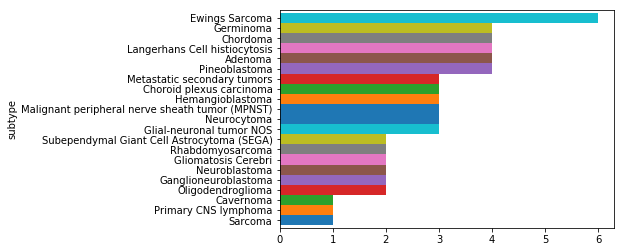

In [19]:
patientfiledata.groupby('subtype')['subtype'].agg('count').sort_values(ascending=False).tail(21).sort_values(ascending=True).plot.barh(width=1)
plt.show()

How often does the experimental strategy WGS occur?

In [3]:
metadata.groupby('experimental_strategy')['experimental_strategy'].agg('count')

experimental_strategy
WGS    946
Name: experimental_strategy, dtype: int64